# Сборный проект №1 

[Архив с датасетом по Metacritic.](https://drive.google.com/file/d/16xHEtvwDH5_8FviFUtnjgerh3nX1tCfF/view?usp=sharing)

### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


### Описание данных ###
*	`Name` — название игры
*	`Platform` — платформа
*	`Year_of_Release` — год выпуска
*	`Genre` — жанр игры
*	`NA_sales` — продажи в Северной Америке (миллионы проданных копий)
*	`EU_sales` — продажи в Европе (миллионы проданных копий)
*	`JP_sales` — продажи в Японии (миллионы проданных копий)
*	`Other_sales` — продажи в других странах (миллионы проданных копий)
*	`Critic_Score` — оценка критиков (максимум 100)
*	`User_Score` — оценка пользователей (максимум 10)
*	`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

# библиотеки для скрапинга
import requests
from bs4 import BeautifulSoup

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('games.csv')

df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Вывод ###

В датафрейме 16715 строк и 11 столбцов. Данные во всех столбцах делятся на 2 типа: `float` и `object`.
В столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating` имеются пропуски значений.

Кроме того, в данных можно увидеть следующие ошибки:
* в названиях столбцов присутсвуют заглавные буквы
* некоторые данные имеют неправильный тип:
   * Год выпуска имеет тип `float` 
   * Оценки пользователей имеют тип `object`

Помимо этого, можно перевести данные с типом `float64` в разряд поменьше для экономии памяти.

## Предобработка данных ##

### Изменение названия столбцов ### 

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Столбцы переименованы.

### Изменение типов данных ###

Для экономии памяти понизим разрядность данных с типом `float`.

In [7]:
df = df.astype({
    'na_sales':'float32', 
    'eu_sales':'float32', 
    'jp_sales':'float32', 
    'other_sales':'float32', 
    'critic_score':'float32',
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float32
 5   eu_sales         16715 non-null  float32
 6   jp_sales         16715 non-null  float32
 7   other_sales      16715 non-null  float32
 8   critic_score     8137 non-null   float32
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float32(5), float64(1), object(5)
memory usage: 1.1+ MB


In [8]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.360001,28.959999,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.610000,10.930000,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,NaN


Заменить тип у столбца `year_of_relaese` мы пока не можем, т.к. он содержит пропуски. Поэтому перейдем к обработке пропущенных значений

### Пропуски значений ###

In [9]:
df[df['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В данных пропущены названия 2 игр (возможно, даже, что это одна и та же игра, выпущенная на разных рынках) но определить, что это за игры только по дате выпуска и продажам - невозможно. 
Так как пропусков всего 2, можно их удалить, не боясь исказить дальнейший анализ.

In [10]:
df = df.dropna(subset=['name']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float32
 5   eu_sales         16713 non-null  float32
 6   jp_sales         16713 non-null  float32
 7   other_sales      16713 non-null  float32
 8   critic_score     8137 non-null   float32
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float32(5), float64(1), object(5)
memory usage: 1.1+ MB


In [11]:
sorted(df['year_of_release'].unique())

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 nan]

In [12]:
df[df['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В идеале, пропуски в датах можно заполнить, найдя информацию о выходе игры в Интернете. 
Однако, ручной поиск информации по 269 играм - довольно трудоемкий процесс.

Но библиотеки Python позволяют автоматизировать этот процесс. 
Применяя библиотеки `requests` и `BeautifulSoup`, можно написать программу для скраппинга сайта Metacritic, на котором есть информация о большинстве игр, выходивших на разных платформах.
Сразу же оттуда возьмем оценку критиков.

*Так как скрапинг идет по нескольким тысячам игр, код выполняется больше часа.
Поэтому данные я выгрузил в отдельный датасет [`metacritic_data.csv`](https://drive.google.com/file/d/162q3fcHQdiuwvow832W78rZnUqX0hlz0/view?usp=sharing), a блок с кодом просто закомментировал.*
 
*С Metacritic можно достать и пользовательские оценки. 
Но я парсил сайт по странице поиска, а user score доступны только со страницы конкретной игры.
Чтобы их достать нужно подключить еще одну дополнительную библиотеку `Selenium`, но для ee работы необходимо скачивать webdriver.
Кроме того, это еще в несколько раз увеличело бы время исполнения программы, поэтому пропуски в пользовательсих оценках я решил не заполнять таким образом.*



In [13]:
na_games = list(df[(df['year_of_release'].isna() == True) | (df['critic_score'].isna() == True)]['name'].unique())
len(na_games)

7229

In [14]:
%%time
url_list = []

for value in na_games:
    value = str(value).replace(' ', '%20')
    url_list.append(f'https://www.metacritic.com/search/game/{value}/results')

metacritic = {'name':[], 'platform':[], 'date':[], 'score':[]}

for url in url_list:
    user_agent = {'User-agent': 'Chrome/99.0.4844.84'}
    response = requests.get(url, headers = user_agent)
    soup = BeautifulSoup(response.text, 'html.parser')
    games = soup.find_all('div', class_='result_wrap')
            
    for game in games:
        try:
            metacritic['name'].append(game.find('h3', class_='product_title basic_stat').find('a').text.strip())
            metacritic['platform'].append(game.find('span', class_='platform').text.strip())
            metacritic['score'].append(game.find('div', class_='main_stats').find_all('span')[0].text.strip())
            metacritic['date'].append(game.find('span', class_='platform').next_sibling.strip())
        except KeyError:
            pass


CPU times: total: 9min 30s
Wall time: 43min 26s


In [15]:
metacritic_data = pd.DataFrame(metacritic)
metacritic_data.info()
metacritic_data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12958 entries, 0 to 12957
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      12958 non-null  object
 1   platform  12958 non-null  object
 2   date      12958 non-null  object
 3   score     12958 non-null  object
dtypes: object(4)
memory usage: 405.1+ KB


,name,platform,date,score
0,New Super Mario Bros. 2,3DS,"Game, 2012",78
1,New Super Mario Bros.,DS,"Game, 2006",89
2,New Super Mario Bros. U,WIIU,"Game, 2012",84
3,Super Mario Advance 4: Super Mario Bros. 3,GBA,"Game, 2003",94
4,New Super Mario Bros. Wii,WII,"Game, 2009",87
5,Arcade Archives: Vs. Super Mario Bros.,Switch,"Game, 2017",tbd
6,Classic NES Series: Super Mario Bros.,GBA,"Game, 2004",84
7,Puzzle & Dragons Z + Puzzle & Dragons: Super M...,3DS,"Game, 2015",73
8,Super Mario Bros. 3,WII,"Game, 2007",tbd
9,New Super Mario Bros. 2: Coin Challenge Pack C,3DS,"Game, 2012",tbd


In [16]:
# сохраним данные оригинального датафрейма
original_df = df.copy()
original_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.360001,28.959999,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.610000,10.930000,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,NaN


In [17]:
metacritic_data['date'] = metacritic_data['date'].str.extract('(\d+)').astype('float')
metacritic_data.info()
metacritic_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12958 entries, 0 to 12957
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      12958 non-null  object 
 1   platform  12958 non-null  object 
 2   date      12632 non-null  float64
 3   score     12958 non-null  object 
dtypes: float64(1), object(3)
memory usage: 405.1+ KB


,name,platform,date,score
0,New Super Mario Bros. 2,3DS,2012.0,78
1,New Super Mario Bros.,DS,2006.0,89
2,New Super Mario Bros. U,WIIU,2012.0,84
3,Super Mario Advance 4: Super Mario Bros. 3,GBA,2003.0,94
4,New Super Mario Bros. Wii,WII,2009.0,87


In [18]:
metacritic_data['name'] = metacritic_data['name'].str.replace(r'[^\w\s]+', '').str.lower()
df['name'] = df['name'].str.replace(r'[^\w\s]+', '').str.lower()

metacritic_data['platform'] = metacritic_data['platform'].str.lower()
df['platform'] = df['platform'].str.lower()

C:\Users\funkyabe\AppData\Local\Temp\ipykernel_9504\3846634148.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  metacritic_data['name'] = metacritic_data['name'].str.replace(r'[^\w\s]+', '').str.lower()
C:\Users\funkyabe\AppData\Local\Temp\ipykernel_9504\3846634148.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df['name'].str.replace(r'[^\w\s]+', '').str.lower()


In [19]:
df[df['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman the videogame,wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,pdc world championship darts 2008,psp,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,freaky flyers,gc,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,inversion,pc,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,hakuouki shinsengumi kitan,ps3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [20]:
games_list = list(df['name'].unique())
platform_list = list(df['platform'].unique())
metacritic_data = metacritic_data.query('name.isin(@games_list) and platform.isin(@platform_list)').dropna().reset_index(drop=True)

metacritic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6301 entries, 0 to 6300
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      6301 non-null   object 
 1   platform  6301 non-null   object 
 2   date      6301 non-null   float64
 3   score     6301 non-null   object 
dtypes: float64(1), object(3)
memory usage: 197.0+ KB


In [21]:
merged_df = df.merge(metacritic_data, how='left', on=['name','platform']).drop_duplicates().reset_index(drop=True)
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16721 entries, 0 to 16720
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16721 non-null  object 
 1   platform         16721 non-null  object 
 2   year_of_release  16452 non-null  float64
 3   genre            16721 non-null  object 
 4   na_sales         16721 non-null  float32
 5   eu_sales         16721 non-null  float32
 6   jp_sales         16721 non-null  float32
 7   other_sales      16721 non-null  float32
 8   critic_score     8141 non-null   float32
 9   user_score       10022 non-null  object 
 10  rating           9957 non-null   object 
 11  date             4241 non-null   float64
 12  score            4241 non-null   object 
dtypes: float32(5), float64(2), object(6)
memory usage: 1.3+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,date,score
0,wii sports,wii,2006.0,Sports,41.360001,28.959999,3.77,8.45,76.0,8,E,NaN,NaN
1,super mario bros,nes,1985.0,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,NaN,NaN
3,wii sports resort,wii,2009.0,Sports,15.610000,10.930000,3.28,2.95,80.0,8,E,NaN,NaN
4,pokemon redpokemon blue,gb,1996.0,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,NaN,NaN,NaN


In [22]:
for i in range(len(merged_df)):
    if pd.isna(merged_df.loc[i, 'year_of_release']) == True:
        merged_df.loc[i, 'year_of_release'] = merged_df.loc[i, 'date']
    else:
        merged_df.loc[i, 'year_of_release'] = merged_df.loc[i, 'year_of_release']
        
    if pd.isna(merged_df.loc[i, 'critic_score']) == True:
        merged_df.loc[i, 'critic_score'] = merged_df.loc[i, 'score']
    else:
        merged_df.loc[i, 'critic_score'] = merged_df.loc[i, 'critic_score']
        
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16721 entries, 0 to 16720
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16721 non-null  object 
 1   platform         16721 non-null  object 
 2   year_of_release  16588 non-null  float64
 3   genre            16721 non-null  object 
 4   na_sales         16721 non-null  float32
 5   eu_sales         16721 non-null  float32
 6   jp_sales         16721 non-null  float32
 7   other_sales      16721 non-null  float32
 8   critic_score     10419 non-null  object 
 9   user_score       10022 non-null  object 
 10  rating           9957 non-null   object 
 11  date             4241 non-null   float64
 12  score            4241 non-null   object 
dtypes: float32(4), float64(2), object(7)
memory usage: 1.4+ MB


In [23]:
index_to_drop = merged_df[merged_df.loc[:,'name':'other_sales'].duplicated() == True].index

df = (
    merged_df.drop(['date','score'], axis=1)
    .drop(index_to_drop, axis=0)
    .drop_duplicates()
    .reset_index(drop=True)
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16580 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float32
 5   eu_sales         16713 non-null  float32
 6   jp_sales         16713 non-null  float32
 7   other_sales      16713 non-null  float32
 8   critic_score     10411 non-null  object 
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float32(4), float64(1), object(6)
memory usage: 1.1+ MB


In [24]:
display(df)
display(original_df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,Sports,41.360001,28.959999,3.77,8.45,76.0,8,E
1,super mario bros,nes,1985.0,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,Sports,15.610000,10.930000,3.28,2.95,80.0,8,E
4,pokemon redpokemon blue,gb,1996.0,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,samurai warriors sanada maru,ps3,2016.0,Action,0.000000,0.000000,0.01,0.00,NaN,NaN,NaN
16709,lma manager 2007,x360,2006.0,Sports,0.000000,0.010000,0.00,0.00,NaN,NaN,NaN
16710,haitaka no psychedelica,psv,2016.0,Adventure,0.000000,0.000000,0.01,0.00,NaN,NaN,NaN
16711,spirits spells,gba,2003.0,Platform,0.010000,0.000000,0.00,0.00,tbd,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.360001,28.959999,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.610000,10.930000,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.000000,0.000000,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.000000,0.010000,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.000000,0.000000,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.010000,0.000000,0.00,0.00,NaN,NaN,NaN


In [25]:
df['name'] = original_df['name']
df['platform'] = original_df['platform']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.360001,28.959999,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.610000,10.930000,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,NaN


In [26]:
df[df['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1300,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16178,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.00,0.00,65.0,NaN,RP
16291,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16327,Brothers in Arms: Furious 4,X360,NaN,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,M
16346,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Видно, что часть игр все еще остались без даты выхода.
Для некоторых из них, можно заполнить пропуски, исходя из даты выхода этой же игры на других платформах.

In [27]:
games_without_year = tuple(df[df['year_of_release'].isna() == True]['name'].unique())

for game in games_without_year:
    df.loc[df['name'] == game, 'year_of_release'] = df.loc[df['name'] == game, 'year_of_release'].fillna(method='ffill')
    df.loc[df['name'] == game, 'year_of_release'] = df.loc[df['name'] == game, 'year_of_release'].fillna(method='bfill')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16640 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float32
 5   eu_sales         16713 non-null  float32
 6   jp_sales         16713 non-null  float32
 7   other_sales      16713 non-null  float32
 8   critic_score     10411 non-null  object 
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float32(4), float64(1), object(6)
memory usage: 1.1+ MB


In [28]:
games_without_year

('Space Invaders',
 'LEGO Indiana Jones: The Original Adventures',
 'Call of Duty 3',
 'Rock Band',
 'Triple Play 99',
 'Adventure',
 'Combat',
 'Hitman 2: Silent Assassin',
 'Donkey Kong Land III',
 'Air-Sea Battle',
 'Wheel of Fortune',
 'Namco Museum',
 'Rhythm Heaven',
 'The Lord of the Rings: War in the North',
 'PES 2009: Pro Evolution Soccer',
 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
 'Monster Hunter 2',
 'Metal Gear Solid 2: Substance',
 'Madden NFL 2002',
 'Def Jam: Fight for NY',
 'Fishing Derby',
 'Karate',
 'Circus Atari',
 'The Chronicles of Riddick: Escape from Butcher Bay',
 "Maze Craze: A Game of Cops 'n Robbers",
 'Super Breakout',
 'Hangman',
 'NBA Live 2003',
 "Cubix Robots for Everyone: Clash 'n' Bash",
 'Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)',
 'Tomb Raider (2013)',
 'Custom Robo',
 'Final Fantasy XI',
 'Dragster',
 'Star Wars Jedi Knight II: Jedi Outcast',
 'Slot Machine',
 'Harvest Moon: The Tale of Two Towns',
 'Shrek the Third'

Этот же метод можно применить и к рейтингу ESRB, т.к. возрастной рейтинг игры вряд ли будет меняться в зависимости от платформы.
А вот для пользовательских оценок и оценок критиков такой метод не подойдет, т.к. оценки могут зависеть от того, на какой платформе вышла одна и та же игра.

In [29]:
not_rated = tuple(df[df['rating'].isna() == True]['name'].unique())
rated = tuple(df[df['rating'].isna() == False]['name'].unique())

same_games = set(not_rated).intersection(rated)

for game in same_games:
    df.loc[df['name'] == game, 'rating'] = df.loc[df['name'] == game, 'rating'].fillna(method='ffill')
    df.loc[df['name'] == game, 'rating'] = df.loc[df['name'] == game, 'rating'].fillna(method='bfill')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16640 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float32
 5   eu_sales         16713 non-null  float32
 6   jp_sales         16713 non-null  float32
 7   other_sales      16713 non-null  float32
 8   critic_score     10411 non-null  object 
 9   user_score       10014 non-null  object 
 10  rating           10386 non-null  object 
dtypes: float32(4), float64(1), object(6)
memory usage: 1.1+ MB


In [30]:
df[df['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1300,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
1505,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
1584,Combat,2600,NaN,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN
2009,Donkey Kong Land III,GB,NaN,Platform,0.68,0.31,0.00,0.04,NaN,NaN,NaN
2105,Air-Sea Battle,2600,NaN,Shooter,0.91,0.06,0.00,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15996,Jet Impulse,DS,NaN,Simulation,0.00,0.00,0.02,0.00,NaN,NaN,NaN
16077,Football Manager 2007,X360,NaN,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16078,Ferrari: The Race Experience,Wii,NaN,Racing,0.00,0.01,0.00,0.00,54.0,NaN,E
16346,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [31]:
to_print = (len(df.query('year_of_release == "nan"')) / len(df))
print(f'{to_print :.2%}')

0.00%


У нас осталось 72 игры с неизвестным годом выхода.
Это менее одного процента, поэтому можно их удалить - на результат исследования они сильно не повлияют.

In [32]:
df = df.dropna(subset = ['year_of_release']).reset_index(drop=True)
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16640 entries, 0 to 16639
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16640 non-null  object 
 1   platform         16640 non-null  object 
 2   year_of_release  16640 non-null  int32  
 3   genre            16640 non-null  object 
 4   na_sales         16640 non-null  float32
 5   eu_sales         16640 non-null  float32
 6   jp_sales         16640 non-null  float32
 7   other_sales      16640 non-null  float32
 8   critic_score     10403 non-null  object 
 9   user_score       10003 non-null  object 
 10  rating           10374 non-null  object 
dtypes: float32(4), int32(1), object(6)
memory usage: 1.1+ MB


In [33]:
df.query('critic_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
255,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,tbd,4.8,M
263,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,tbd,4.9,M
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,tbd,4.5,E
273,Warcraft II: Tides of Darkness,PC,1995,Strategy,1.70,2.27,0.00,0.23,tbd,NaN,NaN
291,World Soccer Winning Eleven 9,PS2,2005,Sports,0.12,2.26,0.90,0.77,tbd,8.2,E
...,...,...,...,...,...,...,...,...,...,...,...
16597,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,tbd,tbd,M
16613,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,tbd,tbd,T
16629,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,tbd,tbd,E
16631,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,tbd,tbd,T


In [34]:
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,tbd,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2001,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16620,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16622,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16623,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16629,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,tbd,tbd,E


В столбцах `critic_score` и `user_score` кроме пропусков имеются 2 вида значений: численные, представлющие собой оценку, и `tbd` - от англ. **To Be Determined** - то есть общая оценка еще не определена, т.к. оценку оставило недостаточное количество критиков или пользователей.
Соответсвенно, если оценка не определена, значит ее нет.
Поэтому значиния `tbd` лучше удалить, и оставить только извесные оценки, т.к. иначе эти значения будут мешать дальнейшему анализу.

In [35]:
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16640 entries, 0 to 16639
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16640 non-null  object 
 1   platform         16640 non-null  object 
 2   year_of_release  16640 non-null  int32  
 3   genre            16640 non-null  object 
 4   na_sales         16640 non-null  float32
 5   eu_sales         16640 non-null  float32
 6   jp_sales         16640 non-null  float32
 7   other_sales      16640 non-null  float32
 8   critic_score     8562 non-null   float64
 9   user_score       7581 non-null   float64
 10  rating           10374 non-null  object 
dtypes: float32(4), float64(2), int32(1), object(4)
memory usage: 1.1+ MB


In [37]:
not_rated = tuple(df[df['critic_score'].isna() == True]['name'].unique())
rated = tuple(df[df['critic_score'].isna() == False]['name'].unique())

critic_rated_games = set(not_rated).intersection(rated)

df.query('name.isin(@critic_rated_games)').sort_values(by='name').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1781,007: Quantum of Solace,PS3,2008,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
3114,007: Quantum of Solace,Wii,2008,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
14597,007: Quantum of Solace,PC,2008,Action,0.01,0.01,0.00,0.00,70.0,6.3,T
9476,007: Quantum of Solace,DS,2008,Action,0.11,0.01,0.00,0.01,65.0,NaN,T
1284,007: Quantum of Solace,X360,2008,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
4462,007: Quantum of Solace,PS2,2008,Action,0.17,0.00,0.00,0.26,NaN,NaN,T
11228,50 Cent: Bulletproof,PSP,2006,Action,0.08,0.00,0.00,0.01,NaN,NaN,M
4389,50 Cent: Bulletproof,XB,2005,Action,0.33,0.10,0.00,0.02,50.0,5.9,M
983,50 Cent: Bulletproof,PS2,2005,Action,0.85,0.76,0.00,0.16,47.0,6.6,M
7075,AC/DC LIVE: Rock Band Track Pack,X360,2008,Misc,0.21,0.00,0.00,0.02,63.0,4.9,T


In [38]:
not_rated = tuple(df[df['user_score'].isna() == True]['name'].unique())
rated = tuple(df[df['user_score'].isna() == False]['name'].unique())

user_rated_games = set(not_rated).intersection(rated)

df.query('name.isin(@user_rated_games)').sort_values(by='name').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3114,007: Quantum of Solace,Wii,2008,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
4462,007: Quantum of Solace,PS2,2008,Action,0.17,0.00,0.00,0.26,NaN,NaN,T
14597,007: Quantum of Solace,PC,2008,Action,0.01,0.01,0.00,0.00,70.0,6.3,T
1781,007: Quantum of Solace,PS3,2008,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
9476,007: Quantum of Solace,DS,2008,Action,0.11,0.01,0.00,0.01,65.0,NaN,T
1284,007: Quantum of Solace,X360,2008,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
1203,007: The World is not Enough,N64,2000,Action,1.13,0.38,0.02,0.03,81.0,NaN,T
2237,007: The World is not Enough,PS,2000,Action,0.51,0.35,0.00,0.06,61.0,6.7,T
6858,4x4 EVO 2,XB,2001,Racing,0.18,0.05,0.00,0.01,59.0,6.2,E
9204,4x4 EVO 2,GC,2002,Racing,0.11,0.03,0.00,0.00,56.0,NaN,E


Заполнять пропуски в рейтингах на основе оценок той же игры на других платформах, конечно, не совсем корректно, т.к. бывают случаи, когда на разных платформах оценки игры могут довольно сильно различаться.
Однако, это все-таки скорее исключения, и в среднем оценки у одной и той же игры будут похожи. 
Поэтому часть пропусков можно заполнить на основе данных средних оценок игры на разных платформах.

In [39]:
for game in critic_rated_games:
    df.loc[df['name'] == game, 'critic_score'] = (df
                                                  .loc[df['name'] == game, 'critic_score']
                                                  .fillna(df.loc[df['name'] == game, 'critic_score'].mean()))

for game in user_rated_games:
    df.loc[df['name'] == game, 'user_score'] = (df
                                                  .loc[df['name'] == game, 'user_score']
                                                  .fillna(df.loc[df['name'] == game, 'user_score'].mean()))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16640 entries, 0 to 16639
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16640 non-null  object 
 1   platform         16640 non-null  object 
 2   year_of_release  16640 non-null  int32  
 3   genre            16640 non-null  object 
 4   na_sales         16640 non-null  float32
 5   eu_sales         16640 non-null  float32
 6   jp_sales         16640 non-null  float32
 7   other_sales      16640 non-null  float32
 8   critic_score     9567 non-null   float64
 9   user_score       8680 non-null   float64
 10  rating           10374 non-null  object 
dtypes: float32(4), float64(2), int32(1), object(4)
memory usage: 1.1+ MB


Оставшиеся пропуски в `critic_score` и `user_score` оставим без изменений, т.к. их заполнение может исказить дальнеший анализ.

Теперь посмотрим на оставшиеся пропуски в столбце `rating`.

In [40]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Среди значений есть 2, на которые стоит обратить внимание: K-A и RP.
K-A или "Kids to Adults" - это устаревшее значение рейтинга "Для всех". Сейчас вместо него используется E.
RP - означает, что у игры еще нет определенного рейтинга.

Поэтому, в таблице заменим K-A на E, а RP на None.

In [41]:
df['rating'] = df['rating'].where(df['rating'] != 'K-A', 'E')
df['rating'] = df['rating'].where(df['rating'] != 'RP', np.nan)
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

In [42]:
df[(df['rating'].isna() == True) & (df['na_sales'] >= 5)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.200001,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.930000,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.050000,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.000000,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.780000,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.380000,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.830000,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.540000,3.44,3.84,0.46,NaN,NaN,NaN


In [43]:
df['rating'] = df['rating'].fillna('No data')

Часть пропусков может быть связана с тем, что игры были выпущены до 1994 года, когда была основана система ESRB.
У некоторых игр пропуск означает, что они в принципе не оценивались - их нет в системе на сайте ESRB.

Если взять список игр с наибольшими продажами и отсутсвующим рейтингом, можно увидеть, что большая часть игр предназначены для всех возрастов.
Однако, заполнять пропуски на основе этого предположения - нельзя.
Поэтому оставшиеся пропуски оставим без изменений.

### Добавление значений в таблицу ### 

Для каждой игры посчитаем суммарные продажи и добавим их в таблицу.

In [44]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,No data,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,No data,31.380001


## Исследовательский анализ данных ##

Нам нужно изучить следующие вопросы:

*	Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
*	Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
*	Определить актуальный период в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
*	Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
*	Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
*	Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
*	Соотнесите выводы с продажами игр на других платформах.
*	Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Анализ выхода игр по годам и по платформам

Для начала посмотрим, сколько игр выходило в разные годы, а так же сумму продаж по годам.

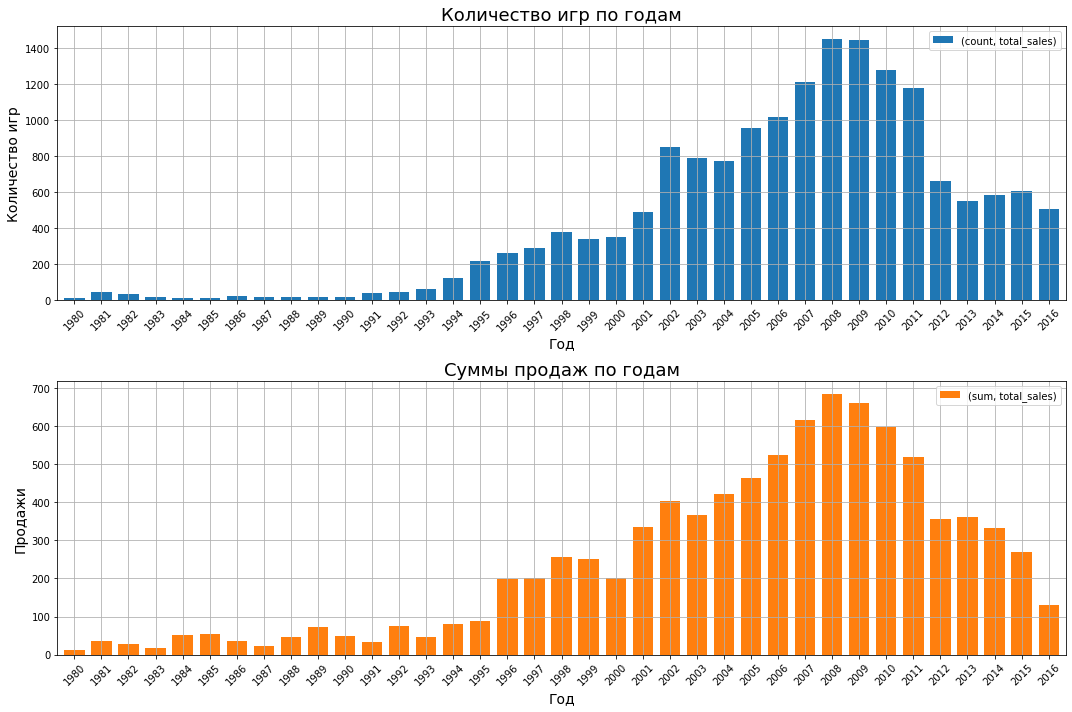

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))

(df
 .pivot_table(index='year_of_release', values='total_sales', aggfunc=['count', 'sum'])
 .rename(columns={('count', 'total_sales'):'Количество игр', '(sum, total_sales)':'Продажи игр'})
 .plot(kind='bar', 
        grid=True, 
        figsize=(15,15), 
        fontsize = 10,
        subplots=True,
        sharex=False,
        width=0.75,
        ax=ax,
        rot=45
       )
)
ax[0].set_xlabel('Год', fontsize=14)
ax[1].set_xlabel('Год', fontsize=14)
ax[0].set_ylabel('Количество игр', fontsize=14)
ax[1].set_ylabel('Продажи', fontsize=14)
ax[0].set_title('Количество игр по годам', fontsize=18)
ax[1].set_title('Cуммы продаж по годам', fontsize=18)
ax[0].grid(True)
ax[1].grid(True)
fig.tight_layout()

По графику видно, что начиная с 2001 года в среднем в год выходило более 500 игр, а общие продажи были выше 300 млн. 
Больше всего игр выходило в период с 2006 по 2011 год. 
С 2012 года количество выпускаемых игр сократилось до в среднем 600 игр в год.

В дальнейшем анализе можно не учитывать игры выходвшие до 1996 года, т.к. продажи были меньше 200 млн и количесто выпускаемых игр было в основном меньше 100 ежегодно.

Далее найдем, на каких платформах было больше всего продаж.

<AxesSubplot:xlabel='platform'>

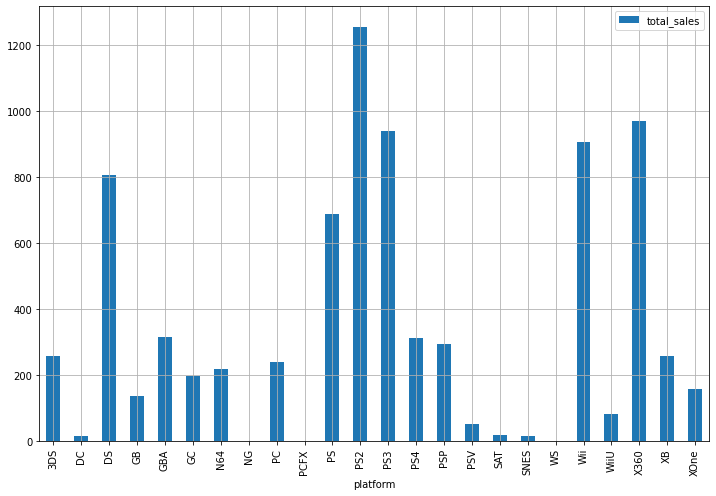

In [46]:
(df
 .query('year_of_release > 1995')
 .pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .plot(kind='bar', grid=True, figsize=(12,8))
)

In [47]:
platform_years = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min','max']).reset_index()
platform_years['lifetime'] = platform_years[('max', 'year_of_release')] - platform_years[('min', 'year_of_release')]
display(platform_years)
print('Средняя продолжительность поддержки платформы -', platform_years['lifetime'].mean(), 'лет')

,platform,min,max,lifetime
,,year_of_release,year_of_release,
0,2600,1980,1994,14
1,3DO,1994,1995,1
2,3DS,2010,2016,6
3,DC,1998,2008,10
4,DS,1985,2013,28
5,GB,1988,2001,13
6,GBA,2000,2007,7
7,GC,2001,2007,6
8,GEN,1990,1994,4


Средняя продолжительность поддержки платформы - 7.870967741935484 лет


Видно, что самыми популярными плаформами являются Nintendo DS, Sony Playstation 1, 2 и 3, Nintendo Wii и Xbox 360. 
Playstation 1 можно не учитывать, т.к. последние игры для нее выпускались в 2003 году.
Но стоит принять в расчет игры на Plastation 4, Xbox One и Wii U - небольшие продажи на данных платформах обоснованы тем, что платформы относительно новые.

Посмотрим на список актуальных платформ на 2016 год.

In [48]:
up_to_date = df.query('year_of_release >= 2014')

up_to_date

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No data,14.630000
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,No data,11.680000
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.580000
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,No data,7.980000
...,...,...,...,...,...,...,...,...,...,...,...,...
16628,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No data,0.010000
16632,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,No data,0.010000
16635,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No data,0.010000
16637,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No data,0.010000


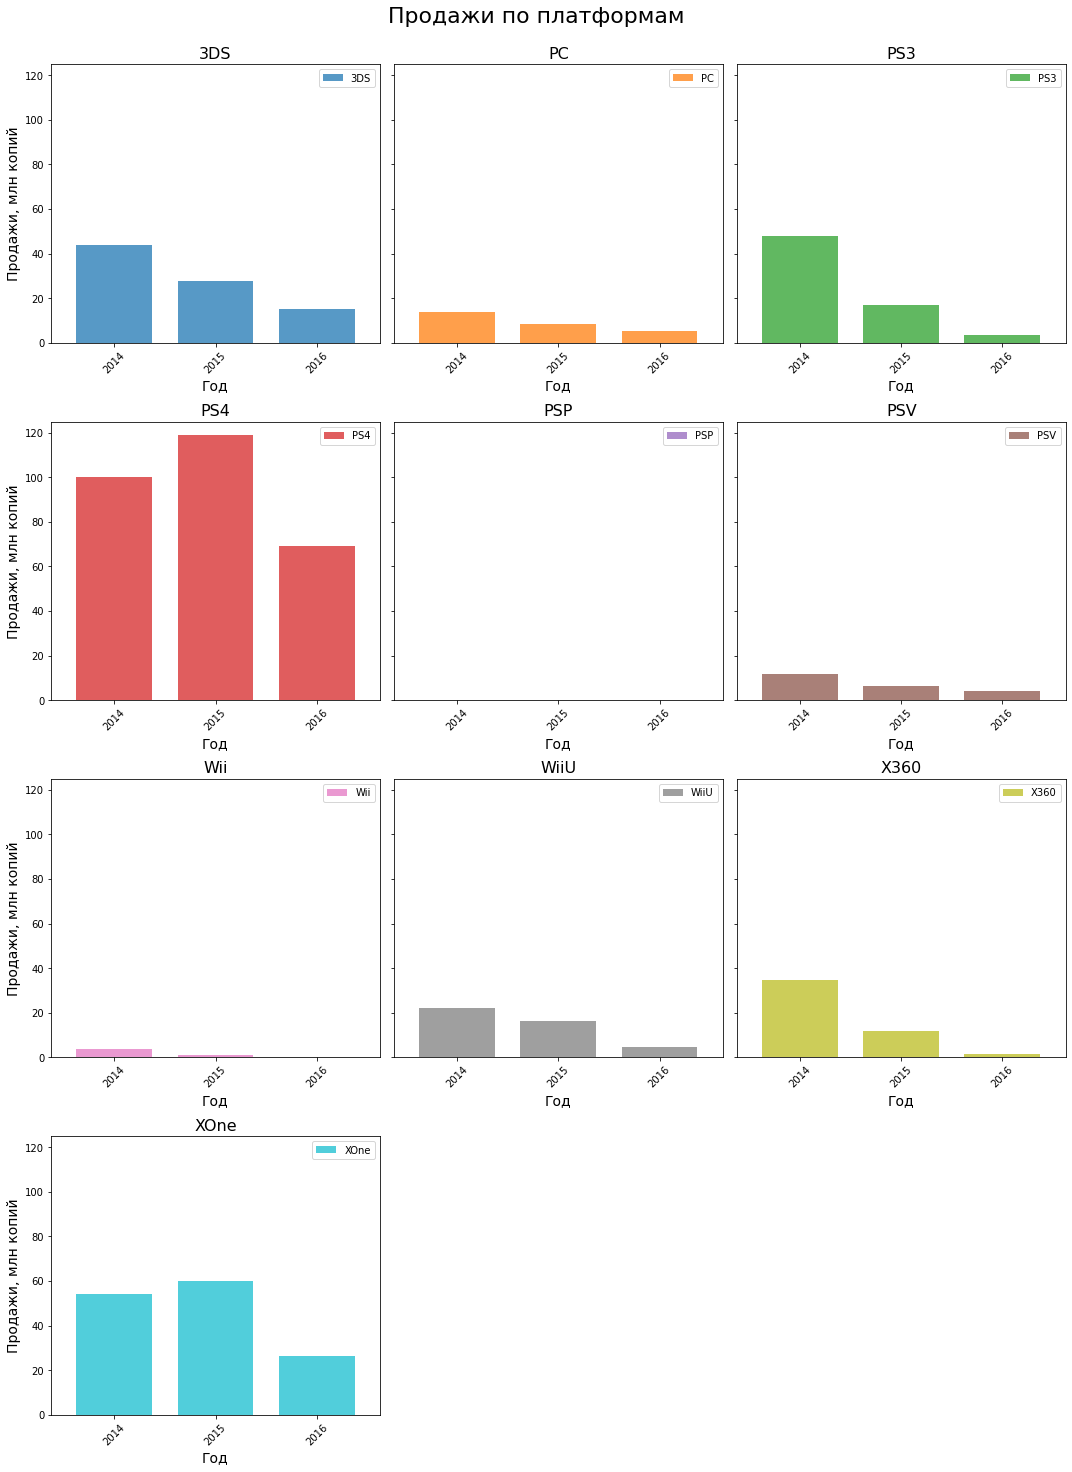

In [49]:
platform_list = list(up_to_date["platform"].unique())
platform_list

up_to_date_df = (df
                 .query('year_of_release >= 2014')
                 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'))


axes = up_to_date_df.plot(
    kind='bar', 
    subplots=True, 
    width=0.75, 
    alpha=0.75,
    layout=(4, 3), 
    sharex=False, 
    sharey=True, 
    figsize=(15,20), 
    fontsize=10,
    rot=45,
    grid=True)

fig = axes[0][0].get_figure() 

for ax, title in zip(axes.ravel(), up_to_date_df.columns):
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Год', fontsize=14)
    ax.set_ylabel('Продажи, млн копий', fontsize=14)
    ax.grid(which='major', axis='both', linestyle='-')
fig.tight_layout()
plt.suptitle('Продажи по платформам', fontsize=22, y=1.02)
plt.show()

Видно, что для многих платформ из нашего списка пик продаж приходится на 2009-2010 годы.
Кроме того, можно увидеть, что с появлением консолей нового поколения, продажи по старым консолям не падают сразу же в ноль, а снижаются постепенно. 
Тем не менее, в 2016 году все еще был спрос на игры предыдущих поколений. 
Поэтому для оценки возьмем период с 2011 года и еще раз взгялнем на графики.

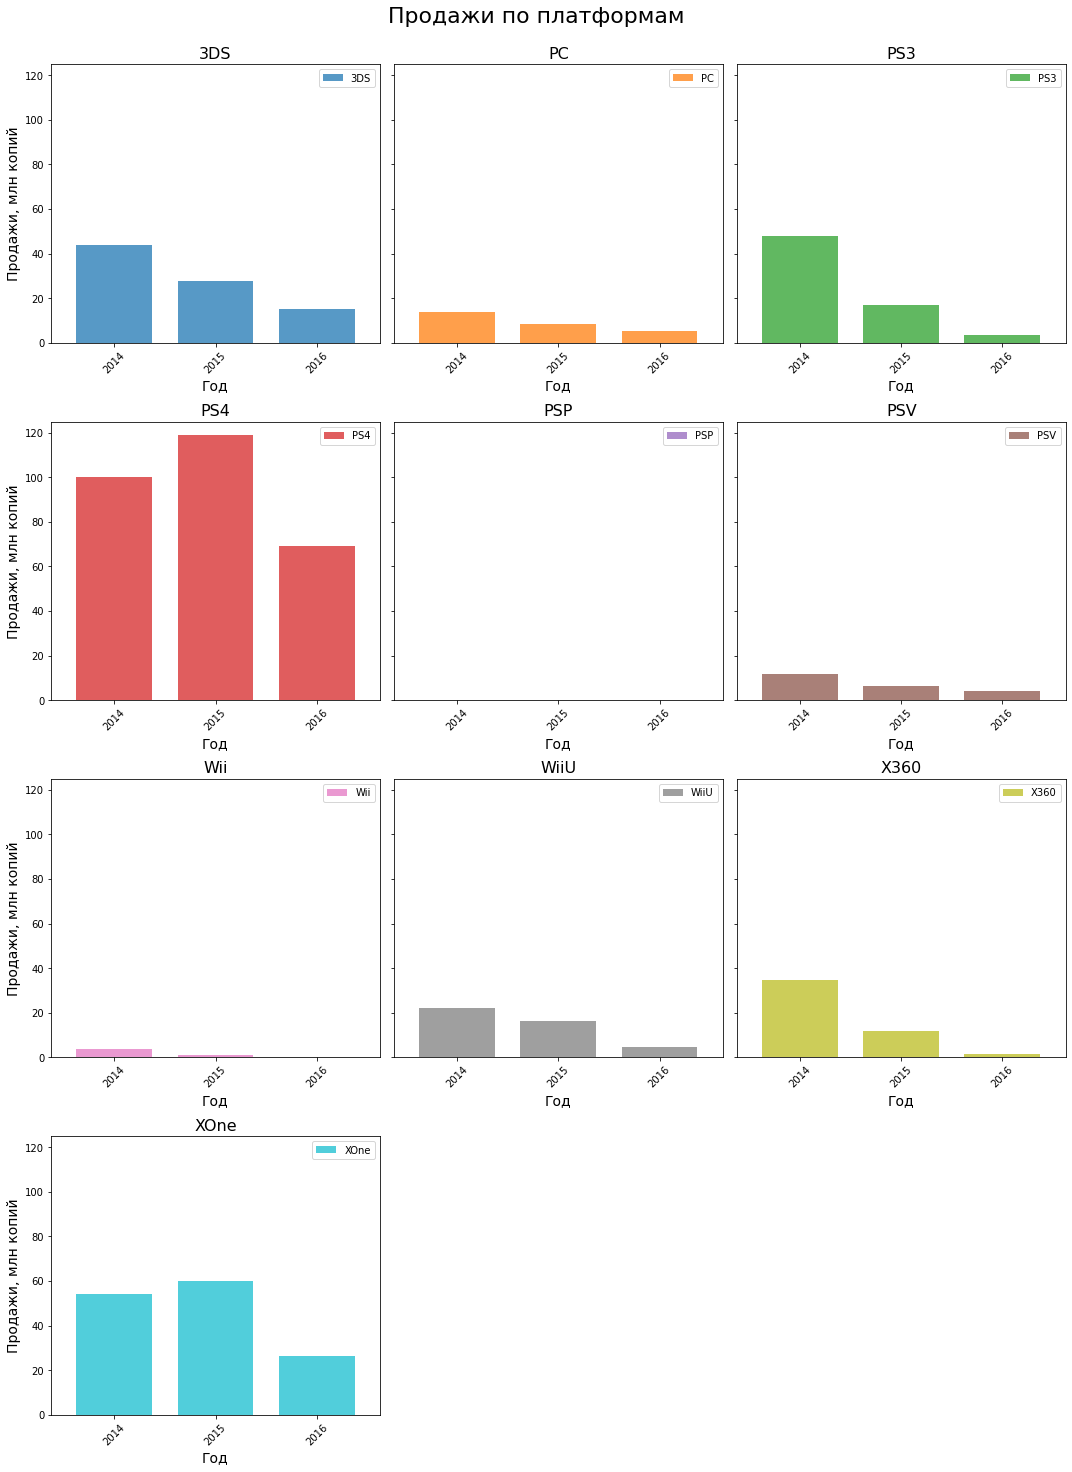

In [50]:
platform_list = list(up_to_date["platform"].unique())
platform_list

up_to_date = df.query('platform.isin(@platform_list) and year_of_release >= 2014')

axes = (up_to_date
        .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
        .plot(
            kind='bar', 
            subplots=True, 
            width=0.75, 
            alpha=0.75,
            layout=(4, 3),     
            sharex=False, 
            sharey=True, 
            figsize=(15,20), 
            fontsize=10,
            rot=45,
            grid=True)
       )
fig = axes[0][0].get_figure() 

for ax, title in zip(axes.ravel(), up_to_date_df.columns):
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Год', fontsize=14)
    ax.set_ylabel('Продажи, млн копий', fontsize=14)
    ax.grid(which='major', axis='both', linestyle='-')
fig.tight_layout()
plt.suptitle('Продажи по платформам', fontsize=22, y=1.02)
plt.show()

In [51]:
platform_list

['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV', 'PSP']

[]

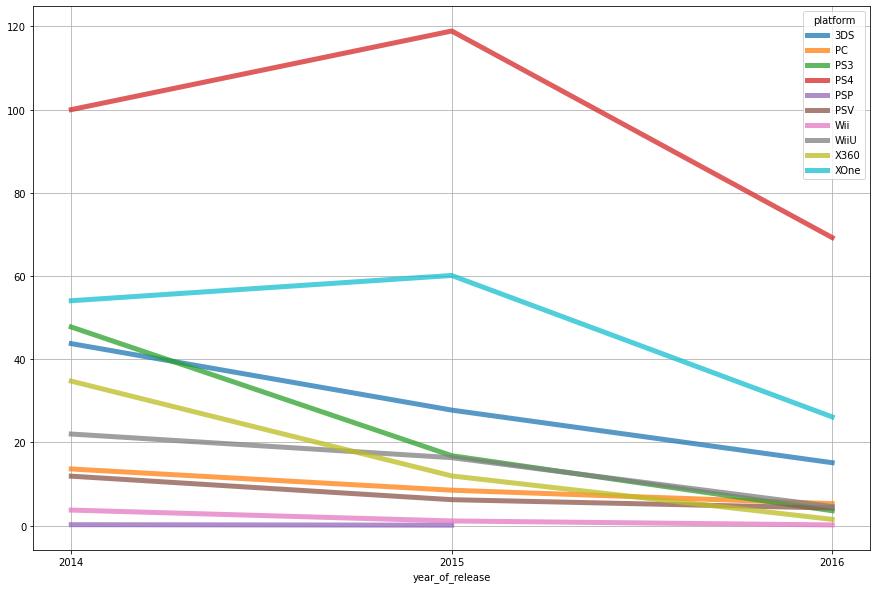

In [52]:
up_to_date = df.query('platform.isin(@platform_list) and year_of_release >= 2014')

axs = (up_to_date.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
        .plot.line(
            lw=5,
            xticks = [2014, 2015, 2016],
            alpha = 0.75,
            sharex=True, 
            sharey=True, 
            figsize=(15,10), 
            grid=True)
       )
#fig = axes[0][0].get_figure() 

plt.plot(data=up_to_date)


Итак, в первую очередь нас должны интересовать игры на новое поколение консолей - Xbox One, Playstation 4, Nintendo 3DS и Wii U. 
Так же стоит добавить в список ПК, т.к. несмотря на, в целом, не слишком высокие продажи, срок жизни данной платформы уже более 20 лет, в отличие от стандартных ~7 лет для консолей. 
Это объясняется тем, что на ПК есть возможность обновления комплектующих и операционных систем.

К сожалению, продажи за 2015-2016 года говорят о том, что скорее всего в 2017 году практически не будет спроса на PS3 и Xbox 360. 
Спрос на DS пропал еще в 2014 году, а на Wii - в 2016.
Учитывая, в целом, не слишком большие продажи, а так же тот факт, что для PSV уже виден спад продаж, ее мы тоже не будем пока рассматривать. 

In [53]:
sns.set(rc={'figure.figsize':(15,12)})

<AxesSubplot:xlabel='platform'>

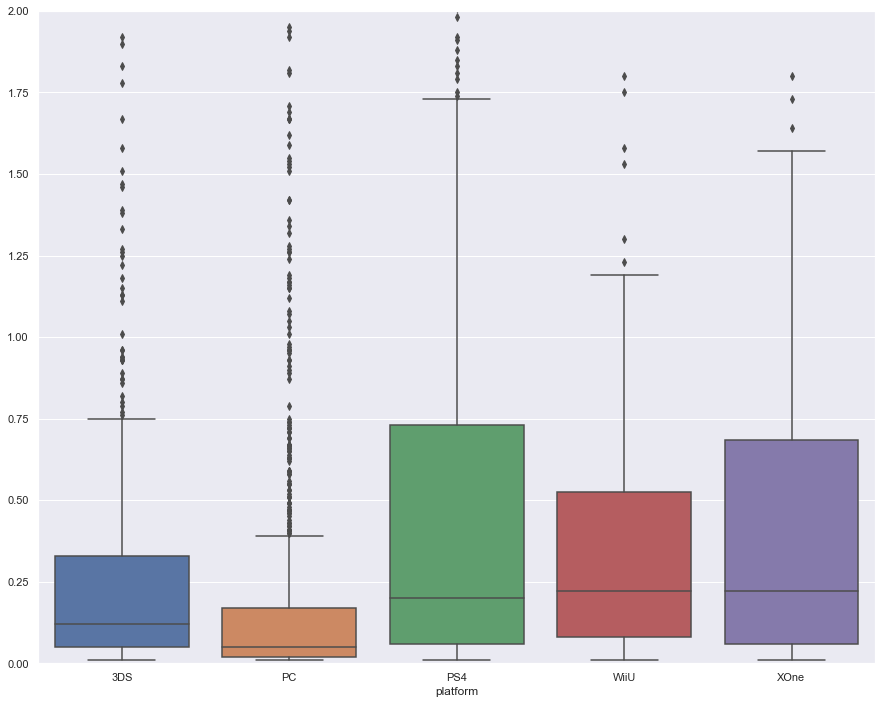

In [54]:
actual_platforms = ['3DS','PC', 'PS4', 'WiiU', 'XOne']

df_actual = (df
             .query('platform.isin(@actual_platforms)')
             .pivot_table(index='name', columns='platform', values='total_sales'))
            
plt.ylim(0,2)

sns.boxplot(data=df_actual)

По "ящику с усами" видно, что больше успешных игр выходит для PS4 и Xbox One - границы ящиков сильно смещены вправо. 
Так же, очень хорошо себя показывают и игры на Wii U - медианное значение такое же, как и Xbox.
Хорошие продажи по данным платформам могут быть связаны с тем, что в целом игр на них выпускается меньше, чем на ПК, поэтому гораздо больше внимание уделяется маркетингу и продвижению, как игр, так и самих платформ.
Кроме того, для этих платформ часто выпускаются эксклюзивные игры.
В целом, для данных платформ прдажи от 1 млн копий не являются редкостью.

Для PC же наоборот, продажи в более чем 400 тысяч копий уже являются выбросами, а в среднем игры продаются по 100-150 тысяч копий. 
Это может быть связано с несколькими факторами:
* ПК больше используют для работы, нежели для игр;
* для ПК создается много инди-игр, которые редко продаются большим числом копий;
* а так же высокий уровень пиратства.

Наибольшем потенциалом обладает PS4, т.к. ее график имеет наибольшее смещение вправо, что говорит о том, что для этой платформы игры продаются, в среднем, большим тиражом. 
Кроме того, именно этой платформе (из выбранных) пренадлежит рекорд по продажам - 14.63 млн копий.



### Анализ влияния отзывов на продажи ###

Теперь на примере PS4 посмотрим, как влияют на продажи отзывы критиков и пользоватлей.


              critic_score  total_sales  user_score
critic_score      1.000000     0.390229    0.563008
total_sales       0.390229     1.000000   -0.026288
user_score        0.563008    -0.026288    1.000000


array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

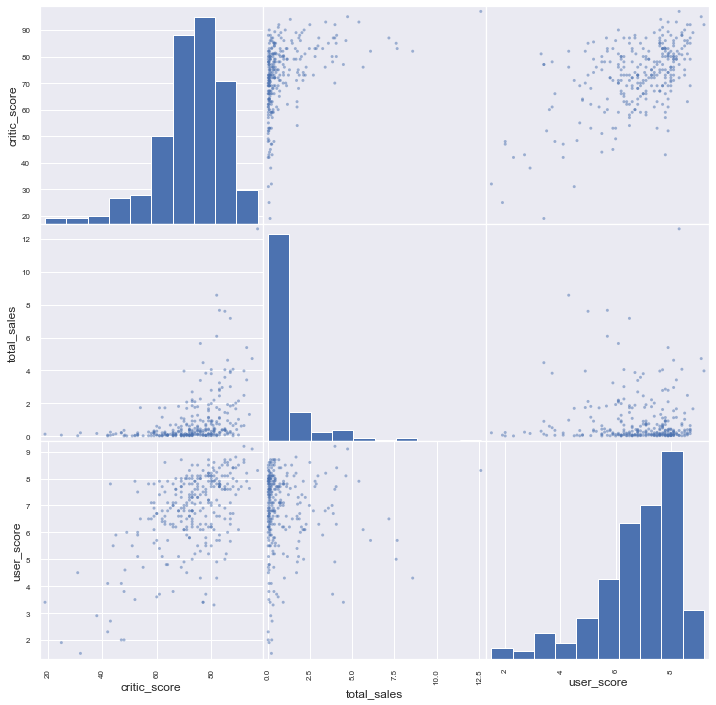

In [55]:
ps_df = df.query('platform == "PS4"').dropna(axis=0)

price_factors = ps_df.pivot_table(index='name', values=['total_sales', 'critic_score', 'user_score'])

print(price_factors.corr())
pd.plotting.scatter_matrix(price_factors, figsize=(12, 12))

Видно, что оценки как критиков, так и обычных пользователей, на самом деле, слабо влияют на продажи игр. 
При этом, для оценок игроков коэффицент корреляции настолько низок, что можно сказать, что они совершенно не влияют на продажи.
Также можно увидеть, что есть зависимость между оценками критиков и оценками пользователей - в среднем, и те, и другие, ставят похожие оценки играм. 

Посмотрим, соответсвует ли это играм на других платформах.

              critic_score  total_sales  user_score
critic_score      1.000000     0.173149    0.626986
total_sales       0.173149     1.000000    0.078108
user_score        0.626986     0.078108    1.000000


array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

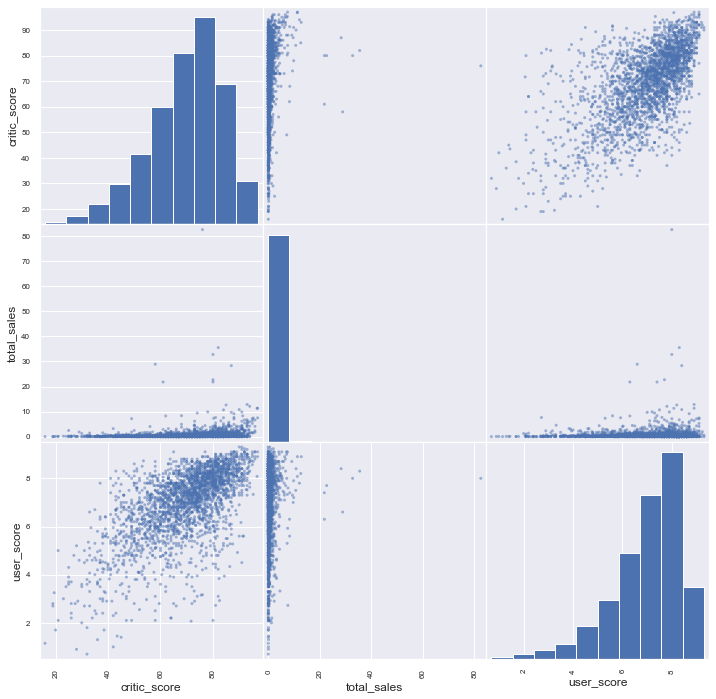

In [56]:
platforms_df = df.query('platform.isin(@platform_list)').dropna(axis=0)

price_factors = platforms_df.pivot_table(index='name', values=['total_sales', 'critic_score', 'user_score'])

print(price_factors.corr())
pd.plotting.scatter_matrix(price_factors, figsize=(12, 12))

Для других платформ ситуация такая же: оценки не влияют на продажи.

Теперь посмотрим на продажи по жанрам для PS4

In [57]:
ps_df.pivot_table(index='genre', values=['total_sales'], aggfunc=['sum', 'count', 'mean']).sort_values(by=[('mean',
'total_sales')], ascending=False)

,sum,count,mean
,total_sales,total_sales,total_sales
genre,,,
Shooter,64.150002,35,1.832857
Sports,55.310001,42,1.316905
Action,87.370003,99,0.882525
Role-Playing,24.790001,35,0.708286
Racing,9.090000,15,0.606000
Fighting,8.360000,14,0.597143
Platform,6.150000,11,0.559091
Simulation,0.740000,2,0.370000


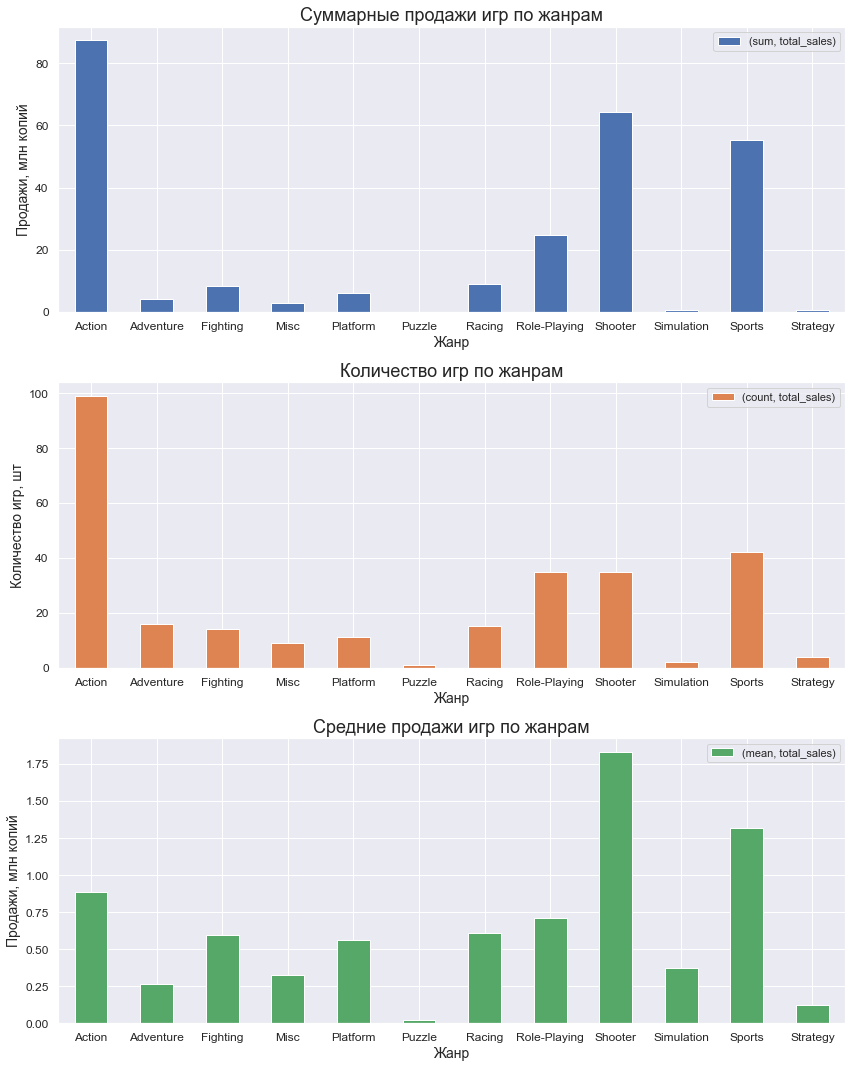

In [58]:
fig, ax = plt.subplots(3, 1, figsize=(12,15))

(ps_df
 .pivot_table(index='genre', values=['total_sales'], aggfunc=['sum','count','mean'])
 .plot.bar(figsize=(15,8), subplots=True, ax=ax, fontsize=12, rot=0)
)

ax[0].set_xlabel('Жанр', fontsize=14)
ax[1].set_xlabel('Жанр', fontsize=14)
ax[2].set_xlabel('Жанр', fontsize=14)
ax[0].set_ylabel('Продажи, млн копий', fontsize=14)
ax[1].set_ylabel('Количество игр, шт', fontsize=14)
ax[2].set_ylabel('Продажи, млн копий', fontsize=14)
ax[0].set_title('Суммарные продажи игр по жанрам', fontsize=18)
ax[1].set_title('Количество игр по жанрам', fontsize=18)
ax[2].set_title('Средние продажи игр по жанрам', fontsize=18)
fig.tight_layout()

Видно, что больше всего продается игр в жанре Action, однако средние продажи больше всего у Шутеров и Спортивных игр.

Самые низкие же продажи у Паззлов и Стратегий

In [59]:
ps_df.pivot_table(index='rating', values=['total_sales'], aggfunc=['sum', 'count', 'mean'])

,sum,count,mean
,total_sales,total_sales,total_sales
rating,,,
E,53.509998,51,1.049216
E10+,21.950001,38,0.577632
M,140.740005,96,1.466042
No data,0.720000,7,0.102857
T,46.739998,91,0.513626


Больше всего продется игр c рейтингом Teen, т.е. 13+ лет. Однако, самые большие продажи у игр для взрослой аудитории с рейтингом M.

In [60]:
ps_df.pivot_table(index='genre', columns='rating', values='total_sales', aggfunc=['count', 'mean']).idxmax()

       rating 
count  E           Sports
       E10+        Action
       M           Action
       No data     Sports
       T           Action
mean   E           Sports
       E10+        Sports
       M          Shooter
       No data    Shooter
       T          Shooter
dtype: object

Посмотрим, на каких платформах какие жанры лидируют по продажам.

In [61]:
df.query('platform.isin(@platform_list) and total_sales < 2').pivot_table(index='platform', columns='genre', values=['total_sales'], aggfunc=['count','mean']).idxmax()

                    genre       
count  total_sales  Action           PS3
                    Adventure        PSP
                    Fighting         PS3
                    Misc             Wii
                    Platform         Wii
                    Puzzle           Wii
                    Racing          X360
                    Role-Playing     PSP
                    Shooter         X360
                    Simulation        PC
                    Sports           Wii
                    Strategy          PC
mean   total_sales  Action          X360
                    Adventure        PS4
                    Fighting         PS3
                    Misc            WiiU
                    Platform         PS4
                    Puzzle          WiiU
                    Racing           PS4
                    Role-Playing    XOne
                    Shooter          PSV
                    Simulation       PS3
                    Sports           PS4
                    Stra

### Анализ пользователей по регионам ###

Нужно определить для пользователя каждого региона (NA, EU, JP):

* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для начала посмотрим на популярность платформ по разным регионам.

In [62]:
na_top = (up_to_date
          .pivot_table(index='platform', values='na_sales', aggfunc='sum')
          .sort_values(by='na_sales', ascending=False)
         )

na_platfroms = list(na_top.head().index)

na_top.index = na_top.index.where(na_top.index.isin(na_platfroms), 'other')
na_top = na_top.groupby(by=na_top.index).sum()
na_top

,na_sales
platform,
3DS,22.639999
PS3,22.049999
PS4,98.610001
X360,28.299999
XOne,81.269997
other,31.250000


In [63]:
eu_top = (up_to_date
          .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
          .sort_values(by='eu_sales', ascending=False)
         )

eu_platfroms = list(eu_top.head().index)

eu_top.index = eu_top.index.where(eu_top.index.isin(eu_platfroms), 'other')
eu_top = eu_top.groupby(by=eu_top.index).sum()
eu_top

,eu_sales
platform,
3DS,16.120001
PC,18.270000
PS3,25.539999
PS4,130.039993
XOne,46.250000
other,34.759998


In [64]:
jp_top = (up_to_date
          .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
          .sort_values(by='jp_sales', ascending=False)
         )

jp_platfroms = list(jp_top.head().index)

jp_top.index = jp_top.index.where(jp_top.index.isin(jp_platfroms), 'other')
jp_top = jp_top.groupby(by=jp_top.index).sum()
jp_top

,jp_sales
platform,
3DS,44.240002
PS3,11.220000
PS4,15.020000
PSV,14.540000
WiiU,7.310000
other,0.760000


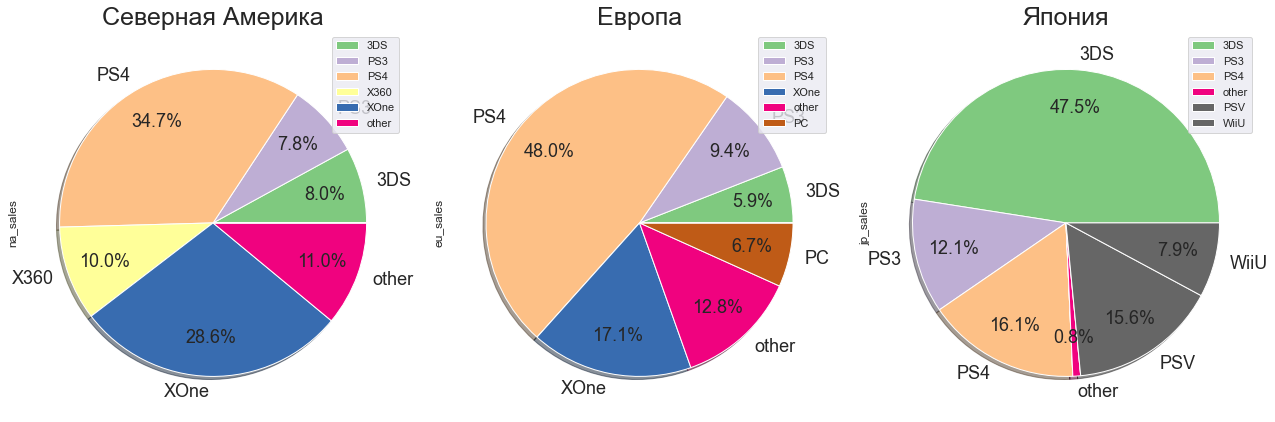

In [65]:
regional_sales = na_top.join([eu_top, jp_top], how='outer')

fig, ax = plt.subplots(1, 3, figsize=(18,15))

regional_sales.plot.pie(
    subplots=True, 
    ax=ax,
    fontsize=18,
    autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
    pctdistance=0.75,
    shadow=True,
    colormap='Accent'
)

ax[0].set_title('Северная Америка', fontsize=25)
ax[1].set_title('Европа', fontsize=25)
ax[2].set_title('Япония', fontsize=25)

fig.tight_layout()

По графикам видно, что жители Японии в большинстве своем предпочитают игры на портативных консоля таких, как 3DS и PSV. Кроме того, видно, что они предпочитаю консоли собственного производства.

В Северной Америке напротив, больше предпочитают консоли от Microsoft - почти 40% в сумме у Xbox 360 и One - однако люди здесь охотно используют и консоли от Sony - почти 35%

Европейцы, как и американцы, не разнообразны в выборе консолей, хотя выбирают Playstation чаще, чем Xbox. Так же, активно используют ПК в качестве игровой платформы. 

Теперь взглянем на жанры игр.

In [66]:
na_top_genres = (up_to_date
                 .pivot_table(index='genre', values='na_sales', aggfunc='sum')
                 .sort_values(by='na_sales', ascending=False)
                )

na_genres = list(na_top_genres.head().index)

na_top_genres.index = na_top_genres.index.where(na_top_genres.index.isin(na_genres), 'other')
na_top_genres = na_top_genres.groupby(by=na_top_genres.index).sum()
na_top_genres

,na_sales
genre,
Action,72.589996
Misc,15.050000
Role-Playing,33.470001
Shooter,79.019997
Sports,46.130001
other,37.860001


In [67]:
eu_top_genres = (up_to_date
                 .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                 .sort_values(by='eu_sales', ascending=False)
                )

eu_genres = list(na_top_genres.head().index)

eu_top_genres.index = eu_top_genres.index.where(eu_top_genres.index.isin(eu_genres), 'other')
eu_top_genres = eu_top_genres.groupby(by=eu_top_genres.index).sum()
eu_top_genres

,eu_sales
genre,
Action,74.930000
Misc,12.860000
Role-Playing,28.170000
Shooter,65.519997
Sports,45.730000
other,43.770000


In [68]:
jp_top_genres = (up_to_date
                 .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                 .sort_values(by='jp_sales', ascending=False)
                )

jp_genres = list(jp_top_genres.head().index)

jp_top_genres.index = jp_top_genres.index.where(jp_top_genres.index.isin(jp_genres), 'other')
jp_top_genres = jp_top_genres.groupby(by=jp_top_genres.index).sum()
jp_top_genres

,jp_sales
genre,
Action,29.58
Fighting,6.37
Misc,5.61
Role-Playing,31.16
Shooter,4.87
other,15.50


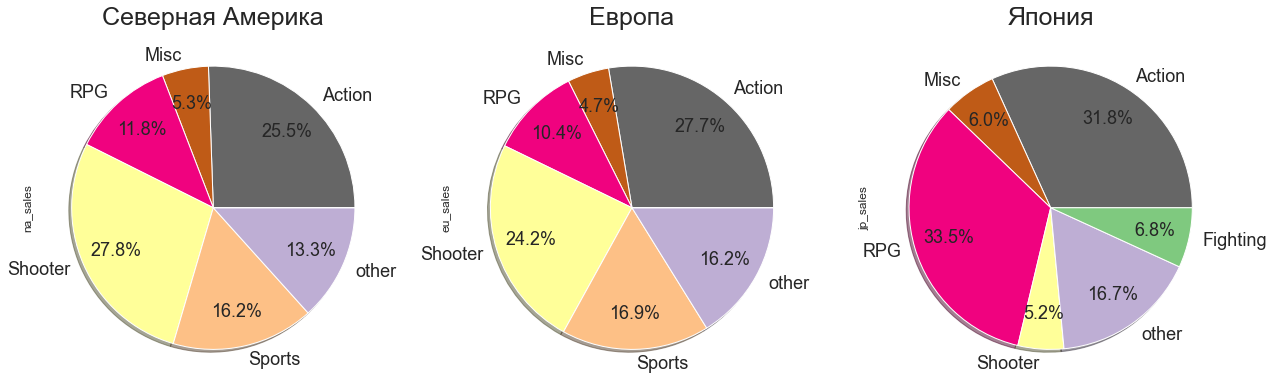

In [69]:
regional_genres = na_top_genres.join([eu_top_genres, jp_top_genres], how='outer')
regional_genres.index = regional_genres.index.where(regional_genres.index != 'Role-Playing', 'RPG')

fig, ax = plt.subplots(1, 3, figsize=(18,15))

regional_genres.plot.pie(
    subplots=True, 
    ax=ax,
    fontsize=18,
    autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
    pctdistance=0.75,
    shadow=True,
    colormap='Accent_r',
    legend=False
)

ax[0].set_title('Северная Америка', fontsize=25)
ax[1].set_title('Европа', fontsize=25)
ax[2].set_title('Япония', fontsize=25)

fig.tight_layout()

Жанровые предпочтения у Северной Америки и у Европы в целом совпадают. В топ-5 одни и те же жанры, а лидируют Action и Shooter. 

Японце тоже любят играть в Экшн-игр, но больше всего они предпочитают RPG и практически не играют в шутеры. Кроме того, у них не попали в топ-5 спортивные игры.

In [70]:
na_top_rating = (up_to_date
                 .pivot_table(index='rating', values='na_sales', aggfunc='sum')
                 .sort_values(by='na_sales', ascending=False)
                )

na_ratings = list(na_top_rating.head().index)

na_top_rating.index = na_top_rating.index.where(na_top_rating.index.isin(na_ratings), 'other')
na_top_rating = na_top_rating.groupby(by=na_top_rating.index).sum()
na_top_rating

,na_sales
rating,
E,50.779999
E10+,34.590000
M,104.320000
No data,54.150002
T,40.279999


In [71]:
eu_top_rating = (up_to_date
                 .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
                 .sort_values(by='eu_sales', ascending=False)
                )

eu_rating = list(eu_top_rating.head().index)

eu_top_rating.index = eu_top_rating.index.where(eu_top_rating.index.isin(eu_rating), 'other')
eu_top_rating = eu_top_rating.groupby(by=eu_top_rating.index).sum()
eu_top_rating

,eu_sales
rating,
E,58.299999
E10+,27.540001
M,102.099998
No data,47.709999
T,35.330002


In [72]:
jp_top_rating = (up_to_date
                 .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
                 .sort_values(by='jp_sales', ascending=False)
                )

jp_rating = list(jp_top_rating.head().index)

jp_top_rating.index = jp_top_rating.index.where(jp_top_rating.index.isin(jp_rating), 'other')
jp_top_rating = jp_top_rating.groupby(by=jp_top_rating.index).sum()
jp_top_rating

,jp_sales
rating,
E,8.980000
E10+,4.770000
M,8.610000
No data,54.450001
T,16.280001


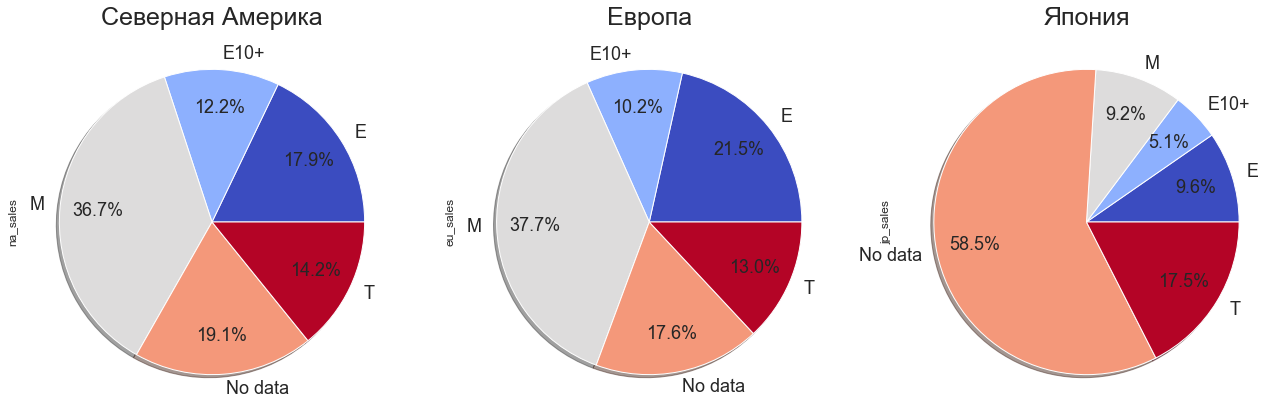

In [73]:
regional_ratings = na_top_rating.join([eu_top_rating, jp_top_rating], how='outer')

fig, ax = plt.subplots(1, 3, figsize=(18,15))

regional_ratings.plot.pie(
    subplots=True, 
    ax=ax,
    fontsize=18,
    autopct=lambda p: '{:1.1f}%'.format(p) if p > 0 else '',
    pctdistance=0.75,
    shadow=True,
    colormap='coolwarm',
    legend=False
)

ax[0].set_title('Северная Америка', fontsize=25)
ax[1].set_title('Европа', fontsize=25)
ax[2].set_title('Япония', fontsize=25)

fig.tight_layout()

У Северной Америки и Европы лидируют игры с рейтингом M. Это может быть связано с их увлечением шутерами.

*По Японии очень большое количество пропусков в рейтинге. Это может быть связано с тем, что система ESRB - американская, и они не оценивают игры выпущенные только на японский рынок.* 

Кроме этого видно, что в Японии гораздо меньше играют в игры, для которых установлен рейтинг 17+. В большая часть игр имеют рейтинг T - для подростков, либо E - для всех.

Поэтому, можно сказать, что если на западе игра с рейтингом М, скорее всего, будет хорошо продаваться, то в Японии не стоит рассчитывать на большой успех. Однако, в целом, рейтинг 17+ никак не мешает продажам.

## Проверка гипотез ##

Нужно проверить 2 гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Сравнение рейтингов платформ ###

Сформулируем нулевую гипотезу как "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".
Соответсвенно, альтернативная гипотеза - "Средние пользовательские рейтинги платформ Xbox One и PC разные".

In [74]:
xone_score = up_to_date.query('platform=="XOne"')['user_score'].dropna()
pc_score = up_to_date.query('platform=="PC"')['user_score'].dropna()

results = st.ttest_ind(
    xone_score, 
    pc_score,
    equal_var=False
)

alpha = .01 

print('p-значение:', results.pvalue) 

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу. Пользовательские оценки у Xbox One и PC различаются.")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.04785880087532756
Не получилось отвергнуть нулевую гипотезу


In [75]:
xone_score.agg(['mean','var','std']).round(2)

mean    6.68
var     1.87
std     1.37
Name: user_score, dtype: float64

In [76]:
pc_score.agg(['mean','var','std']).round(2)

mean    6.31
var     2.93
std     1.71
Name: user_score, dtype: float64

Отвергнуть гипотезу о том, что средние оценки у игр на Xbox One и на ПК одинаковые - не получилось. Поэтому, можно предполагать, что средние оценки игр на этих двух платформах чаще всего будут близки друг к другу.

### Сравнение рейтингов жанров ###

Теперь сравним средние пользовательски рейтинги жанров Action и Sports.
За нулевую гипотезу так же примем равенство средних оценок жанров.
Альтернативная гипотеза - оценки различаются.

In [77]:
action_score = up_to_date.query('genre=="Action"')['user_score'].dropna()
sports_score = up_to_date.query('genre=="Sports"')['user_score'].dropna()

results = st.ttest_ind(
    action_score, 
    sports_score,
    equal_var=False
)

alpha = .01 

print('p-значение:', results.pvalue) 

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу. Пользовательские оценки у игр в жанрах Action и Sports различаются.")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.67894121250446e-18
Отвергаем нулевую гипотезу. Пользовательские оценки у игр в жанрах Action и Sports различаются.


In [78]:
action_score.agg(['mean','var','std']).round(2)

mean    6.79
var     1.90
std     1.38
Name: user_score, dtype: float64

In [79]:
sports_score.agg(['mean','var','std']).round(2)

mean    5.19
var     3.31
std     1.82
Name: user_score, dtype: float64

В данном случае мы можем отвергнуть нулевую гипотезу. Средние пользовательские оценки жанров Action и Sports действительно различаются.

Если посмотреть среднее значение, можно увидеть что средняя оценка жанра Sport - 5.62. Это довольно средний показатель. Такие оценки могут быть связаны с тем, что в большинстве своем, игры данного жанра из года в год выпускаются с минимальными отличиями от игр предыдщих годов. Кроме того, в данных играх встречается довольно много багов.

## Вывод ##

1. В ходе данного проекта были проанализированны данные о компьютерных играх, выпущенных с 1980 по 2016 год на различных платформах. В исходном датасете для каждой игры были прописаны ее название, год выпуска, платформа, продажи по регионам, оценки критиков и простых пользователей и возрастной рейтинг системы ESRB.

    После первичного обзора данных, было обнаружено, что у нас имеются пропуски в данных по году выпуска, оценкам и рейтингу, а также пропущено название у 2 игр. Кроме этого, названия столбцов были записаны с заглавных букв, что вызывало бы неудобство при дальнейшей работе. 
    

2. В процессе предобработки данных были изменены названия столбцов, а также пониженна разрядность у некоторых числовых данных для экономии памяти.

    Для обработки пропусков в значениях была написана программа, которая собирала информацию о дате выхода игры и ее оценке от критиков с сайта Metacritic.com. Эти данные были собраны в отдельный датафрейм и, позже, добавлены к исходным данным. К сожалению, заполнить все пропуски таким способом не получилось. Поэтому для дальнейшей обработки пропусков в годах искались одинаковые игры, вышедшие на разных платформах, и пропуски заполнялись на их основе. Такой же метод был применен к рейтингу ESRB. Оставшуюся часть пропусков в дате выхода были удалены, т.к. они составляли доли процента. 
    Так как достоверно заполнить пропуски в оценках и рейтинге было нельзя, а они все еще составляли большую часть данных, было принято решение заполнить эти пропуски значением `No data`.


3. Далее были проанализированы данные по продажам игр на различных платформах с течением лет. Была посчитана средняя продолжительность жизни платформ, которая составил 6.75 лет. Был составлен список из наиболее актуальных платформ на 2016 год, а так же определен наиболее актуальный период - с 2011 по 2016 год. Анализ показал, что самыми потенциально прибыльными платформами являются **Playstation 4 и Xbox One.**

    Кроме того, был проведен анализ влияния оценок критиков и пользователей на успех игр. Как обнаружилось, между отзывами и продажами игр практически нет корреляци, т.е. они не влияют друг на друга. 


4. После этого были изучены поведенческие паттерны жителей разных регионов. Выяснилось, что японцы предпочитают играть в портативные консоли, а так же в основном выбирают платформы собственного производства. Также узнали, что одним из самых популярных жанров в мире является **Action**, а так же **Shooter** для запада и **RPG** для Японии. Кроме того, оказалось, что возрастные ограничения, в целом, не влияют на продажи.


5. Так же проверялись 2 гипотезы: 
    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    Первую гипотезу не удалось опровергнуть - средние оценки для платформ действиетльно в большинстве своем совпадают.
    Вторая гипотеза подтвердилась - мы отвергли гипотезу о равенстве оценок жанров Action и Sports.

***Итог:*** 
В 2017 году в первую очередь внимание следует уделить играм в жанрах Action, Shooter и RPG, выходящих на Playstation 4 и Xbox One. Так же неплохим спросом могут пользоваться игры для 3DS, и предыдущих поколениях консолей PS3 и Xbox 360.